### 베르누이 분포

- 베르누이 시도(Bernoulli trial) : 결과가 성공 또는 실패 두가지 중 하나로만 나오는 경우
- ( 동전을 던져서 앞이나 뒤가 나오는 경우 )
- 베르누이 시도 결과를 확률변수(random variable) X로 나타낼 때는 성공 1, 실패 0으로 주로 지정한다.
- ( 베르누이 확률 변수는 0, 1 중 하나만 가질 수 있는 이산 확률변수이다 )


* [대표적인 예] 동전을 던졌을 때의 확률 분포


In [1]:
%matplotlib inline

# import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# theta : 1이 나올 확률 (즉, 성공할 확률)
theta = 0.6  
rv = stats.bernoulli(theta)

([<matplotlib.axis.XTick at 0x1e42a6d4df0>,
 [Text(0, 0, 'X=0(fail)'), Text(1, 0, 'X=1(success)')])

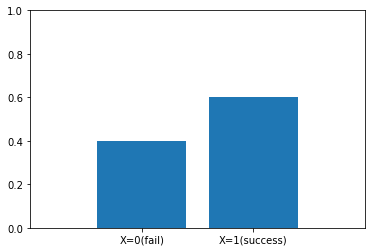

In [3]:
xx = [0,1]
plt.bar(xx, rv.pmf(xx))  # pmf : 확률 질량 메소드
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0,1],["X=0(fail)","X=1(success)"])

# [결과] 성공 0.6, 실패 0.4

[1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1]


C:\Users\simmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


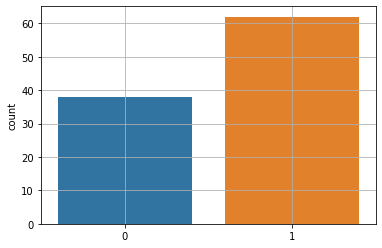

In [4]:
# 베르누이 분포 시뮬레이션 
x = rv.rvs(100, random_state=0) # rvs() : 램덤 샘플 생성 (random variable sampling)
print(x)

import seaborn as sns
sns.countplot(x)
plt.grid(True)
# [결과] 0이 38개 1이 62개

In [5]:
# 위의 이론과 시뮬레이션을 비교하기 위해

import numpy as np
import pandas as pd

y = np.bincount(x, minlength=2) / float(len(x))
df = pd.DataFrame({"Theary": rv.pmf(xx), "Simulation": y})
df.index = [0, 1]
print(df)

   Theary  Simulation
0     0.4        0.38
1     0.6        0.62


   sample value        type     %
0             0      Theary  0.40
1             0  Simulation  0.38
2             1      Theary  0.60
3             1  Simulation  0.62


<AxesSubplot:xlabel='sample value', ylabel='%'>

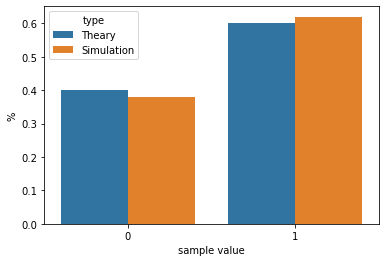

In [6]:
# 더 쉽게 비교하기 위해
re_df = df.stack().reset_index()
re_df.columns = ['sample value', 'type', '%']
print(re_df)

sns.barplot(x='sample value', y='%', hue='type', data=re_df)

In [7]:
"""
    ` stack() : 열인덱스를 행의 값으로 바꾸기
    ` unstack() : 행인덱스를 열의 값으로 바꾸기
"""

# df0 = pd.DataFrame([[0,1],[2,3]], index=['AA','BB'], columns=['x value', 'y value'])
# print(df0)
# print(df0.stack())  # x value와 y value 열인덱스를 행으로 바꾸기
# print(df0)
# print(df0.unstack())

"""    
    ` reset_index() : 기존의 인덱스를 제거하고 그 값들을 하나의 열(column)의 값으로 추가하고 새로운 인덱스를 생성
    ` set_index() : 기존의 행 인덱스를 제거하고 데이터 열 중 하나를 인덱스로 지정

"""
df0 = pd.DataFrame([('A', 300.0), ('B', 25.0), ('C', 99.0), ('D', np.NaN)],
                   index=['aa','bb','cc','dd'],
                   columns=('type', 'speed'))
print(df0)
df0.reset_index()
df0.reset_index(drop=True)  # 기존의인덱스를 추가하지 않고 제거한다


   type  speed
aa    A  300.0
bb    B   25.0
cc    C   99.0
dd    D    NaN


,type,speed
0,A,300.0
1,B,25.0
2,C,99.0
3,D,NaN
